In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.model_selection  import cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score, mean_squared_error
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
df = pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

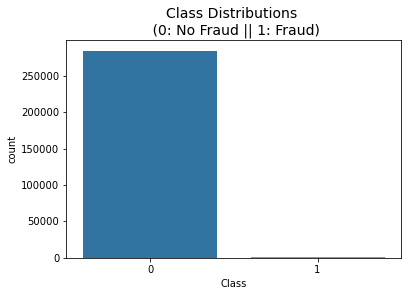

In [6]:
sns.countplot(x='Class',data = df)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

<AxesSubplot:>

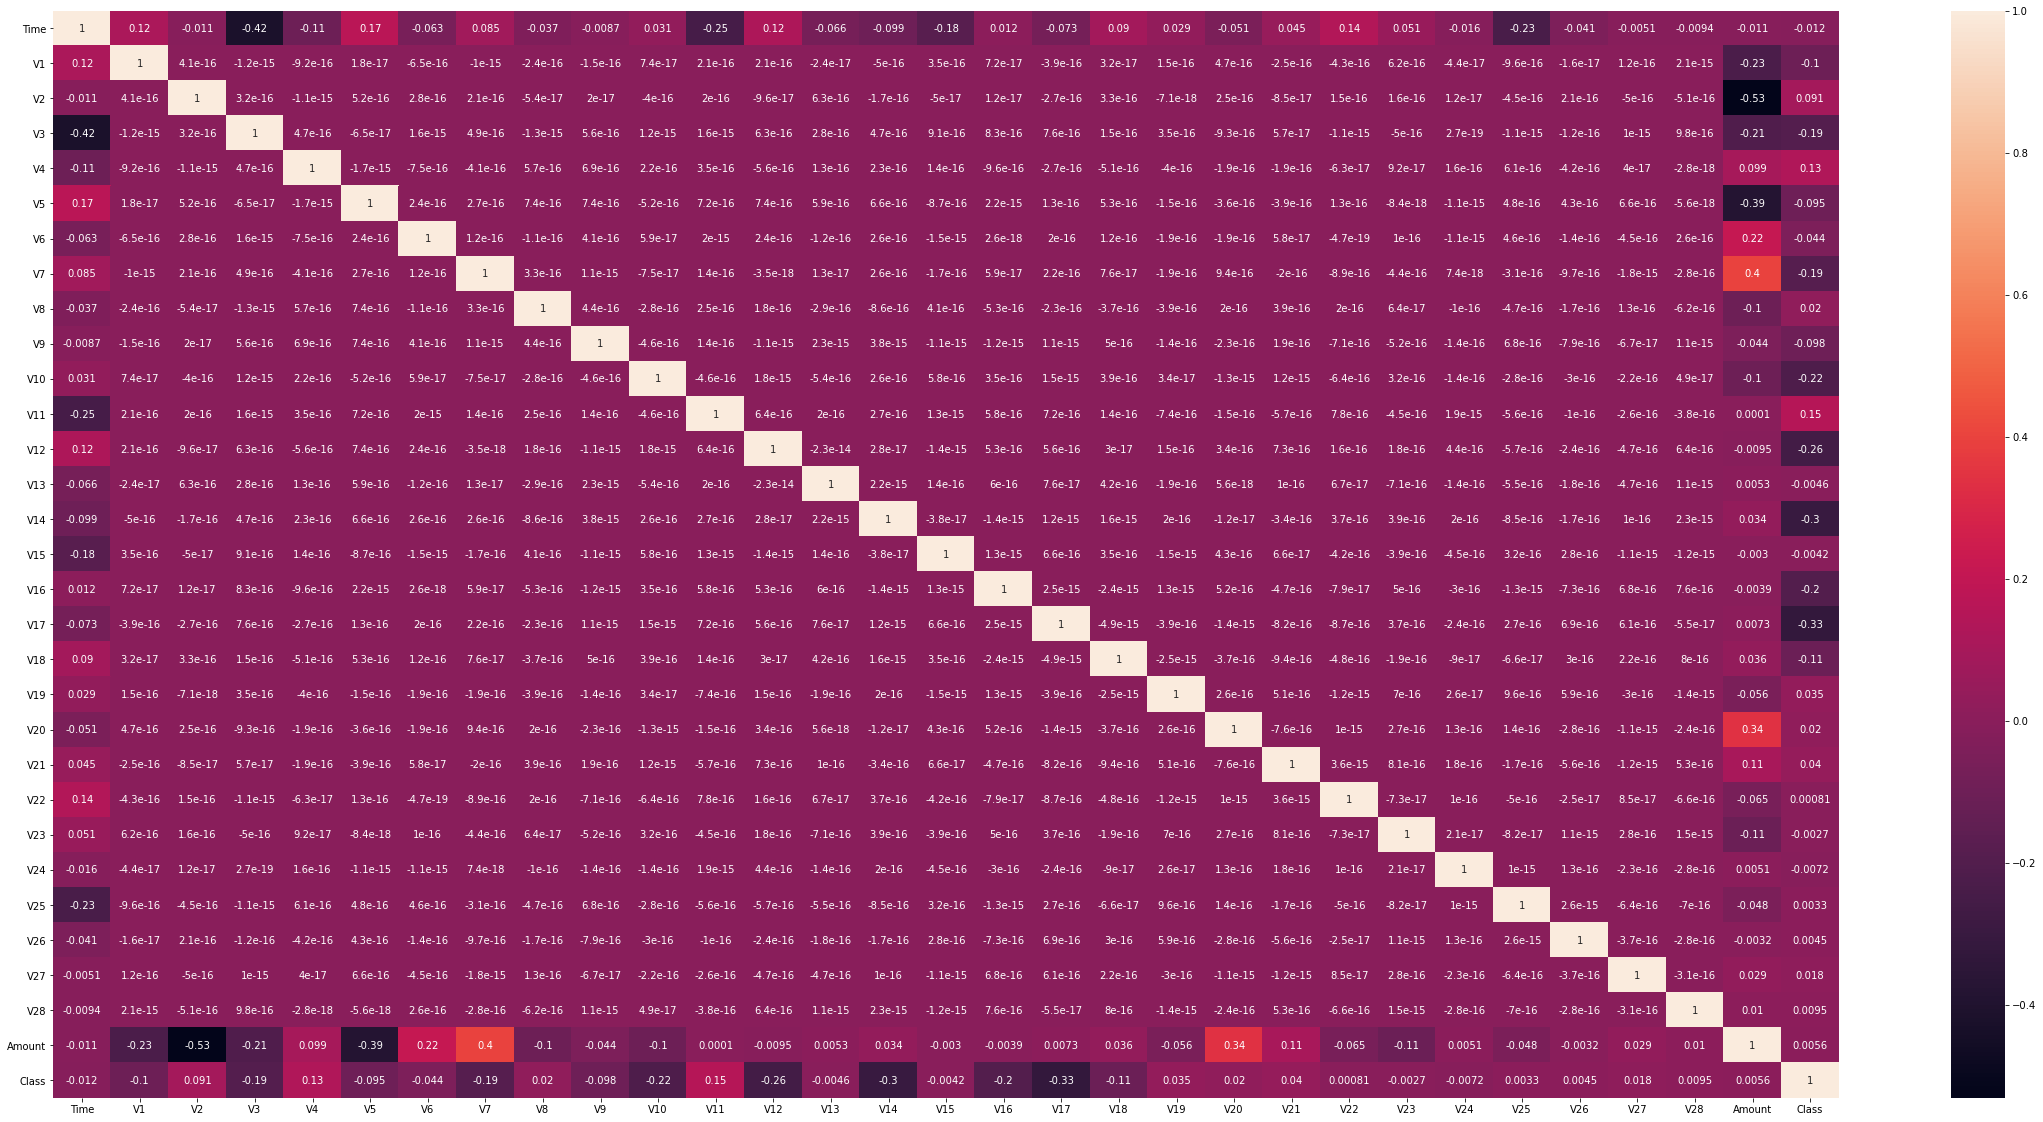

In [7]:
plt.figure(figsize=(40,20))
sns.heatmap(df.corr(),annot=True)

In [8]:
temp = df[['Class','V17','V3','V11','V14','V12','V7']].copy()
# temp=data.copy()
temp

,Class,V17,V3,V11,V14,V12,V7
0,0,0.207971,2.536347,-0.551600,-0.311169,-0.617801,0.239599
1,0,-0.114805,0.166480,1.612727,-0.143772,1.065235,-0.078803
2,0,1.109969,1.773209,0.624501,-0.165946,0.066084,0.791461
3,0,-0.684093,1.792993,-0.226487,-0.287924,0.178228,0.237609
4,0,-0.237033,1.548718,-0.822843,-1.119670,0.538196,0.592941
...,...,...,...,...,...,...,...
284802,0,1.991691,-9.834783,-1.593105,4.626942,2.711941,-4.918215
284803,0,-0.025693,2.035030,-0.150189,-0.675143,0.915802,0.024330
284804,0,0.313502,-3.249640,0.411614,-0.510602,0.063119,-0.296827
284805,0,0.509928,0.702510,-1.933849,0.449624,-0.962886,-0.686180


In [9]:
X = temp.drop("Class", axis=1)
y = temp['Class']

In [10]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0.73717255, 0.8813649 , 0.25248432, 0.63559053, 0.68090763,
        0.26681518],
       [0.72779398, 0.84029849, 0.38118772, 0.64121901, 0.74434157,
        0.26487544],
       [0.76338099, 0.86814082, 0.32242211, 0.64047345, 0.70668336,
        0.27017718],
       ...,
       [0.74023885, 0.781102  , 0.30976257, 0.62888491, 0.70657162,
        0.26354722],
       [0.74594621, 0.84958713, 0.17028775, 0.66117109, 0.6679013 ,
        0.26117523],
       [0.71194186, 0.84960146, 0.22341394, 0.64321812, 0.70300492,
        0.27496281]])

In [11]:
X_train, X_test,y_train,y_test =train_test_split( X,y,random_state = 101,test_size = 0.2)

In [12]:
y_train.value_counts()

0    227456
1       389
Name: Class, dtype: int64

In [13]:
X_train

array([[0.7149108 , 0.86091162, 0.26592534, 0.67191605, 0.67423383,
        0.26318386],
       [0.72151568, 0.84732283, 0.38508306, 0.65871557, 0.74010281,
        0.26312561],
       [0.72242591, 0.85255953, 0.35610933, 0.65635546, 0.70694354,
        0.26013825],
       ...,
       [0.7517863 , 0.84788042, 0.31106956, 0.63665381, 0.68689461,
        0.26306187],
       [0.78254071, 0.79307996, 0.26577885, 0.55175109, 0.64484121,
        0.28508259],
       [0.70392819, 0.8252542 , 0.21352414, 0.63142902, 0.7474766 ,
        0.26289543]])

In [14]:
smote = SMOTE(random_state=42)
print(smote)

X_train, y_train = smote.fit_resample(X_train,y_train)
X_test, y_test = smote.fit_resample(X_test,y_test)

SMOTE(random_state=42)


In [15]:
def evaluate_model():
    model.fit(X_train,y_train)
    pre = model.predict(X_test)
    
    accuracy = accuracy_score(pred)
    recall = recall_score(pre,y_test)
    f1 = f1_score(pre,y_test)

    sns.heatmap(confusion_matrix(pre,y_test),annot=True)
    print(model)
    print('Accuracy : ',accuracy,'Recall : ',recall,"F1 : ",f1)    

In [16]:
model_LR = LogisticRegression()

In [17]:
grid={"C":np.logspace(-3,3,7), "penalty":["l2"]}  # l2 ridge

clf_lsr_cv = GridSearchCV(model_LR,grid,cv=3,scoring='roc_auc')
clf_lsr_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",clf_lsr_cv.best_params_)
print("accuracy :",clf_lsr_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1000.0, 'penalty': 'l2'}
accuracy : 0.9667221789087671


In [18]:
X_train.shape,y_train.shape

((454912, 6), (454912,))

In [19]:
lsr_best = LogisticRegression(penalty='l2',C=10000,random_state = 42)
lsr_clf = lsr_best.fit(X_train,y_train)
lsr_clf

LogisticRegression(C=10000, random_state=42)

In [20]:
predictions = lsr_best.predict(X_test)

In [21]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92     56859
           1       0.97      0.86      0.91     56859

    accuracy                           0.92    113718
   macro avg       0.92      0.92      0.92    113718
weighted avg       0.92      0.92      0.92    113718



In [22]:
from sklearn.metrics import ConfusionMatrixDisplay

In [23]:
print(confusion_matrix(y_test,predictions))

[[55416  1443]
 [ 7955 48904]]


In [24]:
from sklearn.svm import SVC

In [25]:
svc_model = SVC()

In [26]:
svc_model.fit(X_train,y_train)

SVC()

In [27]:
predictions = svc.model.predict(X_test)

NameError: name 'svc' is not defined

In [ ]:
print(confusion_matrix(y_test,predictions))

In [ ]:
print(classification_report(y_test,predicitions))

In [ ]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 

In [ ]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

In [ ]:
grid_predictions = grid.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,grid_predictions))

In [ ]:
print(classification_report(y_test,grid_predictions))

In [ ]:
from sklearn.svm import SVC

# Define the parameter grid for SVM
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'linear']}

# Create a GridSearchCV object with SVM
grid_svm = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, scoring='roc_auc')

# Fit the model
grid_svm.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters found: ", grid_svm.best_params_)
print("Best cross-validation score: ", grid_svm.best_score_)

# Use the best estimator from the grid search to make predictions
svm_best = grid_svm.best_estimator_

# Evaluate the SVM model
evaluate(svm_best)

# Plot the confusion matrix for the best SVM model
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, svm_best.predict(X_test)), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score, mean_squared_error
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Function to load and explore data
def load_and_explore_data(data):
    data = pd.read_csv('creditcard.csv')
    print(data.info())
    print(data['Class'].value_counts())
    sns.countplot(x='Class', data=data)
    plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
    plt.show()
    plt.figure(figsize=(20,10))
    sns.heatmap(data.corr(), annot=True)
    plt.show()
    return data

# Function for data preprocessing
def preprocess_data(data):
    temp = data[['Class','V17','V3','V11','V14','V12','V7']].copy()
    X = temp.drop("Class", axis=1)
    y = temp['Class']
    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)
    return X, y

# Function to handle imbalanced data
def handle_imbalance(X_train, y_train):
    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)
    return X_train, y_train

# Function to evaluate the model
def evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(predictions, y_test)
    recall = recall_score(predictions, y_test)
    f1 = f1_score(predictions, y_test)
    sns.heatmap(confusion_matrix(predictions, y_test), annot=True)
    plt.show()
    print(f'Model: {model}')
    print(f'Accuracy: {accuracy:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')

# Main script
data = load_and_explore_data('creditcard.csv')
X, y = preprocess_data(data)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)

# Handle imbalance in training data only
X_train, y_train = handle_imbalance(X_train, y_train)

# Model training and hyperparameter tuning
model_LR = LogisticRegression()
param_grid = {"C": np.logspace(-3, 3, 7), "penalty": ["l2"]}  # l2 ridge
clf_lsr_cv = GridSearchCV(model_LR, param_grid, cv=3, scoring='roc_auc')
clf_lsr_cv.fit(X_train, y_train)

print("Tuned Hyperparameters: ", clf_lsr_cv.best_params_)
print("Best ROC AUC Score: ", clf_lsr_cv.best_score_)

# Evaluate the best model
best_model = clf_lsr_cv.best_estimator_
evaluate(best_model, X_train, y_train, X_test, y_test)
